<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


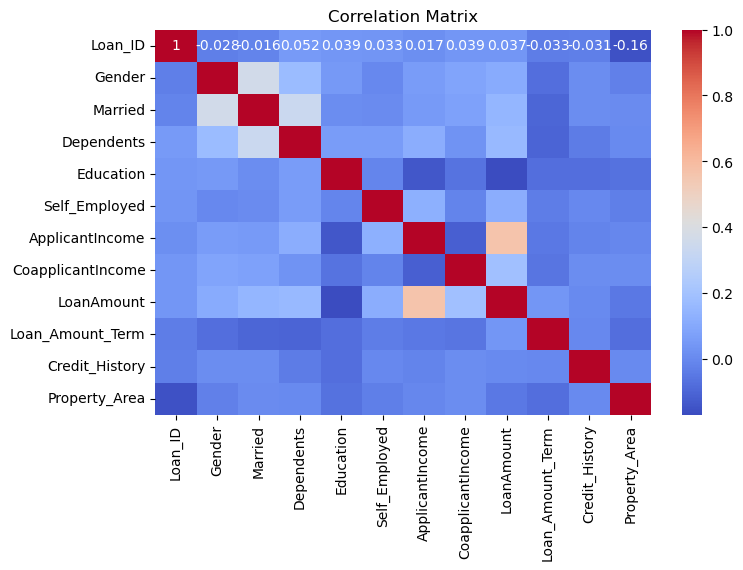

LoanAmount           1.000000
ApplicantIncome      0.564698
CoapplicantIncome    0.189723
Dependents           0.163017
Married              0.146212
Self_Employed        0.114971
Gender               0.106404
Loan_ID              0.037369
Loan_Amount_Term     0.037152
Credit_History      -0.000250
Property_Area       -0.047414
Education           -0.169436
Name: LoanAmount, dtype: float64
Logistic Regression Performance
Accuracy: 0.7837837837837838
[[ 27  38]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

Decision Tree Performance
Accuracy: 0.6756756756756757
[[31 34]
 [26 94]]
              precision    recall  f1-score   support

           0       0.54      0.48      0.51        65
           1 

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


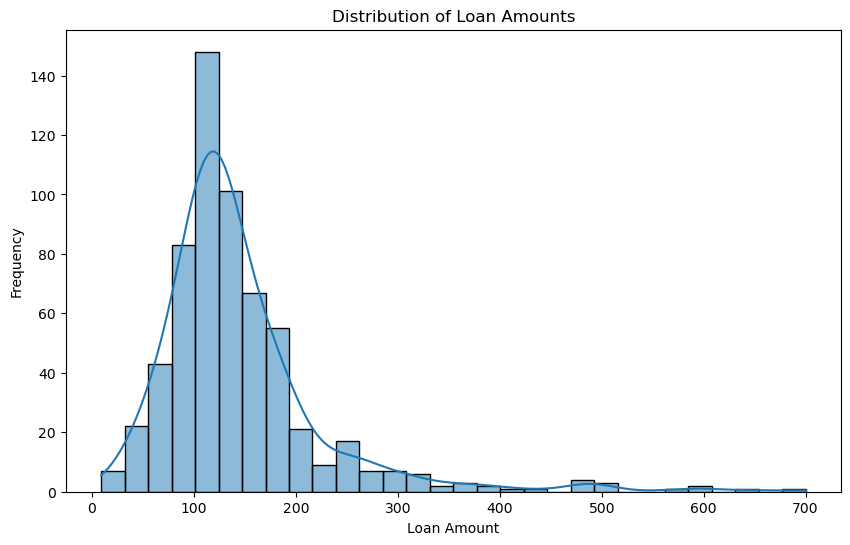

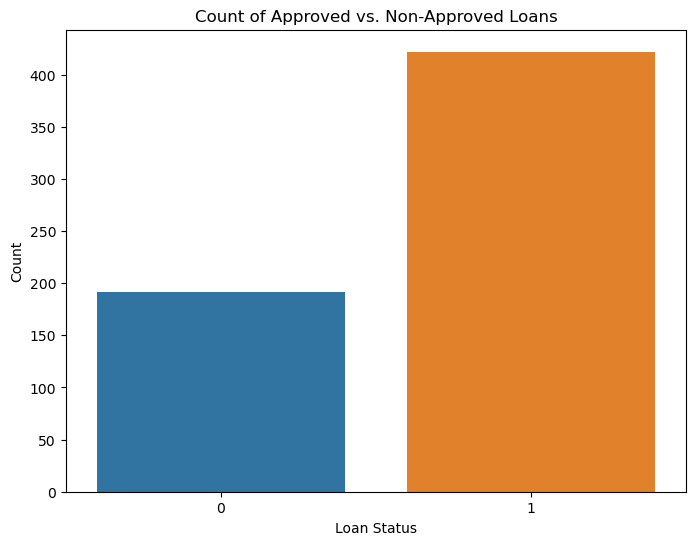

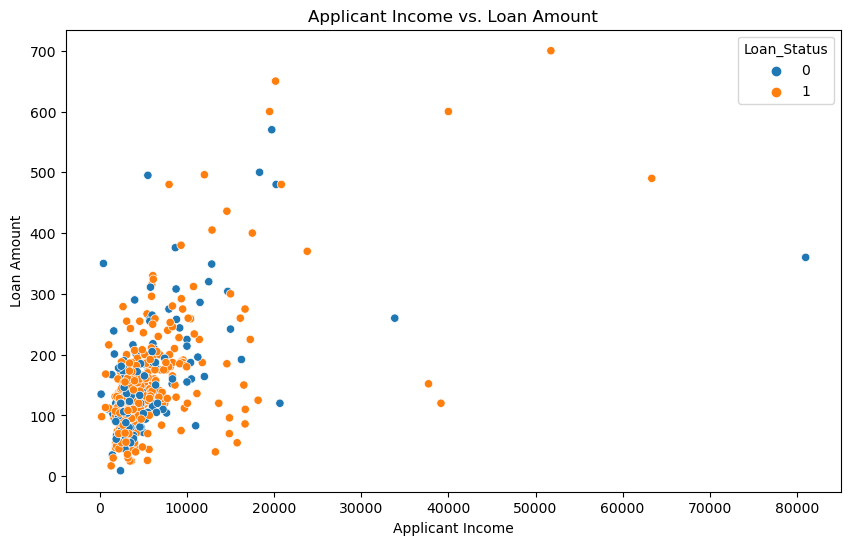

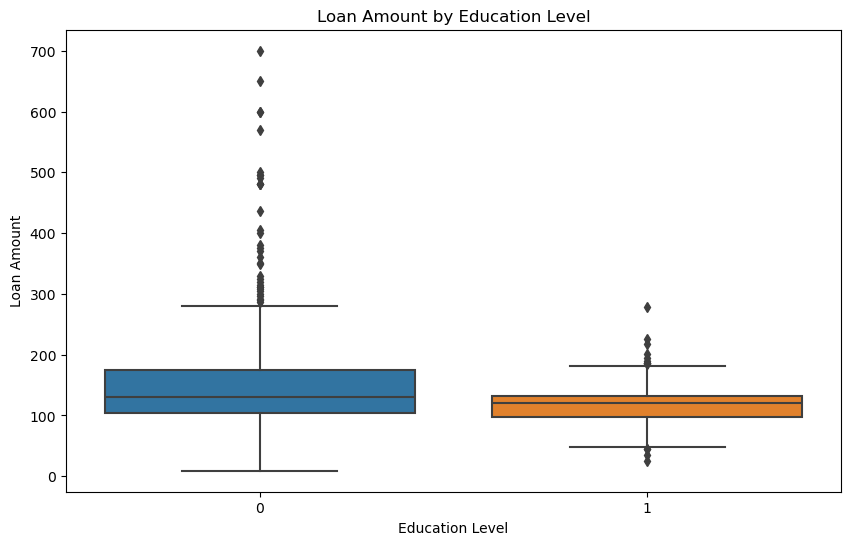

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = r"C:\Users\Lenovo\Downloads\Loan Data for group assignment.csv"
loan_data = pd.read_csv(file_path)

loan_data.head()

loan_data.info()

imputer = SimpleImputer(strategy='most_frequent')
loan_data_imputed = pd.DataFrame(imputer.fit_transform(loan_data), columns=loan_data.columns)

loan_data_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)

loan_data_imputed.isnull().sum()

label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_columns:
    loan_data_imputed[col] = label_encoder.fit_transform(loan_data_imputed[col])

X = loan_data_imputed.drop('Loan_Status', axis=1)
y = loan_data_imputed['Loan_Status']

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix['LoanAmount'].sort_values(ascending=False))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=500)  
decision_tree = DecisionTreeClassifier()

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Decision Tree Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

X_alternate = loan_data_imputed[['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount']]

X_alternate_scaled = scaler.fit_transform(X_alternate)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alternate_scaled, y, test_size=0.3, random_state=42)

log_reg.fit(X_train_alt, y_train_alt)
y_pred_log_reg_alt = log_reg.predict(X_test_alt)
print("Logistic Regression with Alternate Variables Performance")
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_log_reg_alt)}")
print(confusion_matrix(y_test_alt, y_pred_log_reg_alt))
print(classification_report(y_test_alt, y_pred_log_reg_alt))

decision_tree.fit(X_train_alt, y_train_alt)
y_pred_tree_alt = decision_tree.predict(X_test_alt)
print("Decision Tree with Alternate Variables Performance")
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_tree_alt)}")
print(confusion_matrix(y_test_alt, y_pred_tree_alt))
print(classification_report(y_test_alt, y_pred_tree_alt))

loan_data_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)

loan_data_imputed.dropna(inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(loan_data_imputed['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=loan_data_imputed)
plt.title('Count of Approved vs. Non-Approved Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=loan_data_imputed)
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='LoanAmount', data=loan_data_imputed)
plt.title('Loan Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.show()
